# Lec 13. 군집분석(Clustering)
* 비지도 학습(타겟피쳐가 없다)
* 군집: 유사 데이터를 그룹화
* 전반적인 데이터의 유형(특징) 파악에 용이
* https://scikit-learn.org/stable/modules/clustering.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
# ------------------------------------------------------

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# ------------------------------------------------------


import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 차트 관련 속성 (차트크기 ) -----------
# plt.rcParams['figure.figsize'] = (4, 2)
# plt.rcParams['font.size'] = 7

# data load

In [3]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df = pd.DataFrame(data=data["data"], columns=data["feature_names"] )  #index=[]
df.columns = ["sl","sw","pl","pw"]
df['target'] = data["target"]
df.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


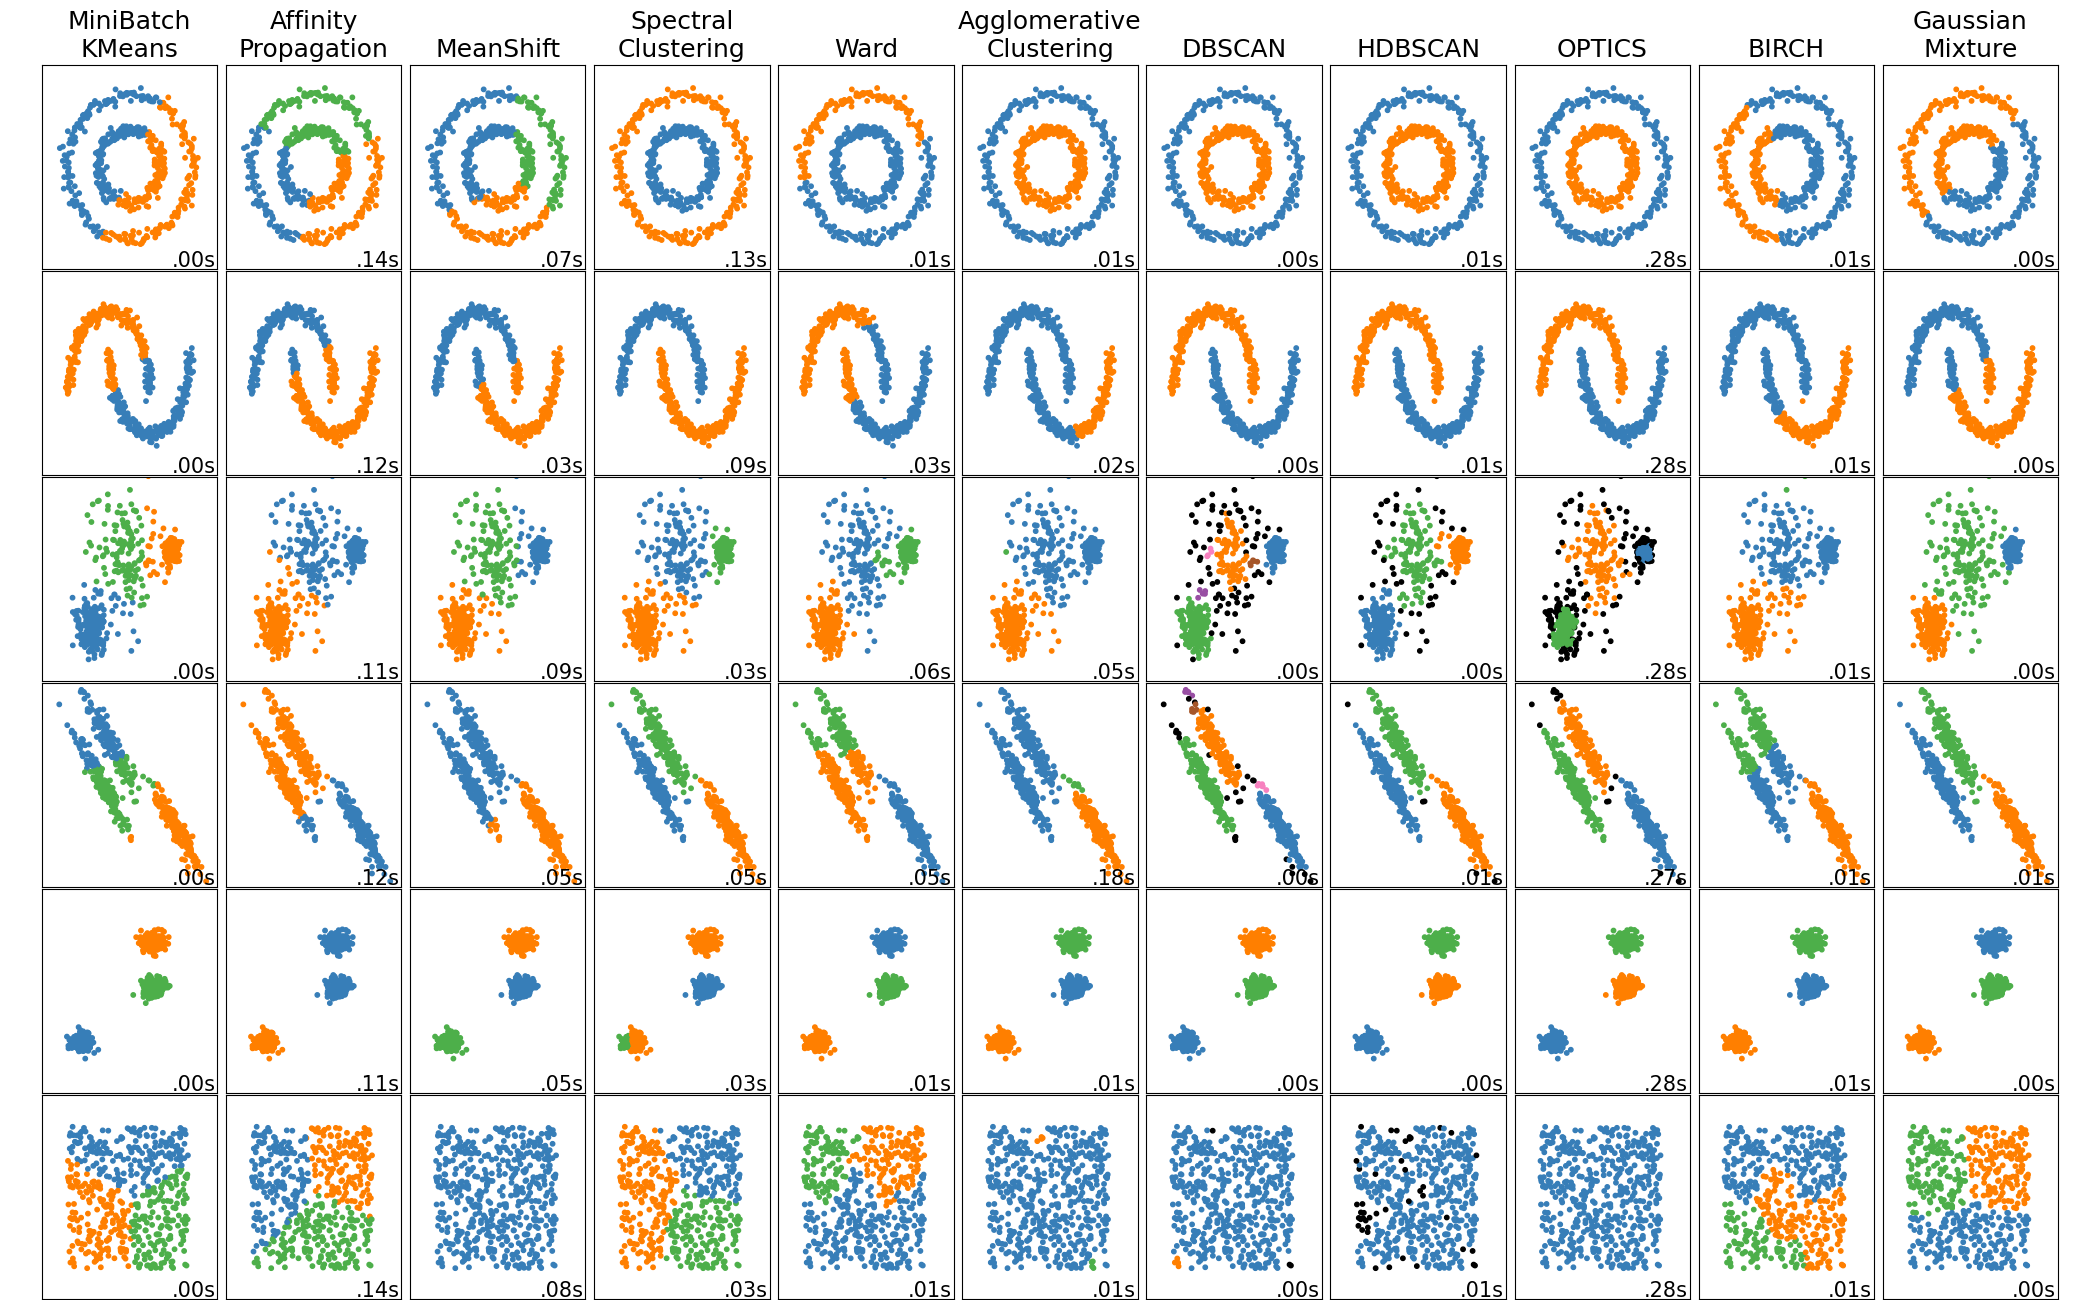

# K-means
* K개 헤더 선출 후 모든 데이터간 거리(유클리드) 계산
* 군집내 평균 거리 계산 후 신규헤더 재선출
* 신규헤더와 모든 데이터간 거리(유클리드) 또 계산
* 더이상의 헤더 변화가 없을 때까지 반복반복반복

https://blog.kakaocdn.net/dn/eiVxaB/btq5j79KUJh/tK99PexS73gUmbkOJ96Ahk/img.gif

In [9]:
y = df['target']
X = df.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [10]:
X.shape, y.shape

((150, 4), (150,))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


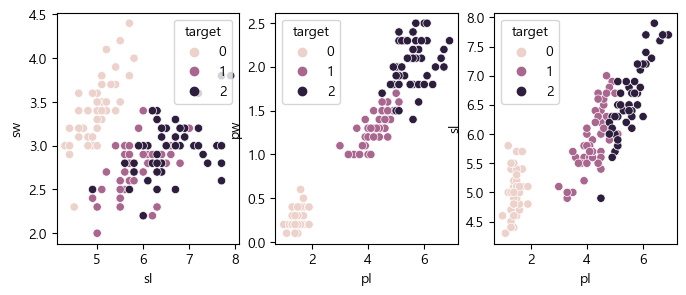

In [24]:
fig,axes = plt.subplots(1,3, figsize=(8,3))
sns.scatterplot(x="sl", y="sw", data=df, hue="target", ax=axes[0])
sns.scatterplot(x="pl", y="pw", data=df, hue="target", ax=axes[1])
sns.scatterplot(x="pl", y="sl", data=df, hue="target", ax=axes[2])
plt.show()

<Axes: >

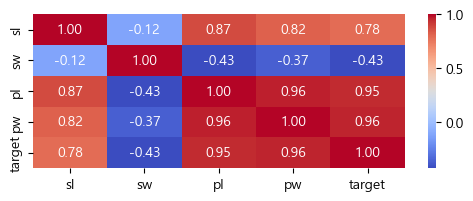

In [22]:
plt.figure(figsize=(6,2))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [25]:
from sklearn.cluster import KMeans

In [56]:
model = KMeans(n_clusters=3, random_state=1212)
model.fit(X_train)
pred = model.predict(X_train)
temp = pd.DataFrame()
temp['y'] = y_train
temp['pred'] = pred
print(model.cluster_centers_)
print(model.labels_)
print(model.inertia_) #가장 가까운헤더~샘플간의 거리합계


[[6.84375000e+00 3.05312500e+00 5.70312500e+00 2.03125000e+00
  2.22044605e-16]
 [4.98750000e+00 3.41750000e+00 1.45750000e+00 2.52500000e-01
  1.00000000e+00]
 [5.87291667e+00 2.74583333e+00 4.41458333e+00 1.44583333e+00
  2.00000000e+00]]
[1 1 2 1 0 1 1 2 0 2 0 0 1 0 1 1 0 1 2 2 2 2 2 1 2 0 1 1 2 1 0 0 1 2 2 2 1
 2 2 0 2 0 1 2 0 2 0 1 1 0 2 1 1 2 2 1 1 1 1 2 1 2 2 2 2 0 1 1 1 0 0 2 0 2
 2 2 2 1 0 2 1 1 1 0 0 0 2 2 0 2 2 1 1 0 1 2 0 0 2 2 0 2 2 0 1 2 0 2 2 2 0
 2 1 1 1 2 2 0 1 0]
61.50879166666667


In [31]:
temp[temp['pred']==2].value_counts()

y  pred
1  2       37
2  2       11
dtype: int64

In [34]:
for i in range(3):
    print(temp[temp['pred']==i].value_counts())
    print('--'*30)

y  pred
2  0       29
1  0        3
dtype: int64
------------------------------------------------------------
y  pred
0  1       40
dtype: int64
------------------------------------------------------------
y  pred
1  2       37
2  2       11
dtype: int64
------------------------------------------------------------


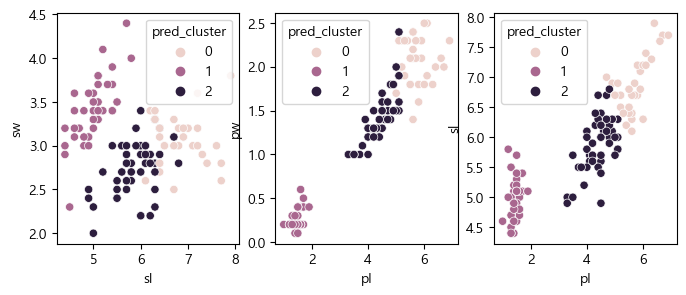

In [37]:
X_train['pred_cluster'] = temp['pred']

fig,axes = plt.subplots(1,3, figsize=(8,3))
sns.scatterplot(x="sl", y="sw", data=X_train, hue="pred_cluster", ax=axes[0])
sns.scatterplot(x="pl", y="pw", data=X_train, hue="pred_cluster", ax=axes[1])
sns.scatterplot(x="pl", y="sl", data=X_train, hue="pred_cluster", ax=axes[2])
plt.show()

In [51]:
import plotly_express as px
px.scatter_3d(X_train, x="pl", y="pw", z="sl", size="sw", 
              color="pred_cluster")

# 평가점수

``` python
silhouette_samples(X, labels, *, metric='euclidean', **kwds)
sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)[source]
```

In [58]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

In [60]:
train_coef = silhouette_samples(X_train, model.labels_)
train_coef # 150개 샘플의 coef값

array([0.76712258, 0.80759276, 0.57739627, 0.86141189, 0.59599075,
       0.85774036, 0.84448479, 0.58654119, 0.63351772, 0.62368872,
       0.59012648, 0.66249342, 0.80148549, 0.71378639, 0.75740511,
       0.83479522, 0.66192735, 0.83602607, 0.72914555, 0.7109999 ,
       0.70638709, 0.56729877, 0.69617563, 0.79407314, 0.45785673,
       0.62729049, 0.8038011 , 0.81335727, 0.70132028, 0.82212415,
       0.58710926, 0.71233755, 0.81901747, 0.70739058, 0.71384301,
       0.69935072, 0.84012418, 0.53481199, 0.68347511, 0.66204117,
       0.72021346, 0.65617661, 0.83097416, 0.64794577, 0.46987702,
       0.70126167, 0.7103923 , 0.86038708, 0.82884393, 0.5521868 ,
       0.63602618, 0.65228093, 0.82782874, 0.72519821, 0.66354079,
       0.85123413, 0.80011214, 0.85841505, 0.84699143, 0.64404285,
       0.65710745, 0.71735294, 0.73021747, 0.61937723, 0.34792979,
       0.68592385, 0.70874193, 0.80979402, 0.7603308 , 0.43255109,
       0.7156311 , 0.71564418, 0.51048331, 0.63215946, 0.62996

In [62]:
X_train['coef'] = train_coef
# X_train['pred_cluster'] = pred # model.labels_ ( pred_cluster과 같다 )
X_train

,sl,sw,pl,pw,pred_cluster,coef,pred_Cluster
8,4.4,2.9,1.4,0.2,1,0.767123,1
23,5.1,3.3,1.7,0.5,1,0.807593,1
101,5.8,2.7,5.1,1.9,2,0.577396,2
49,5.0,3.3,1.4,0.2,1,0.861412,1
111,6.4,2.7,5.3,1.9,0,0.595991,0
...,...,...,...,...,...,...,...
94,5.6,2.7,4.2,1.3,2,0.728858,2
62,6.0,2.2,4.0,1.0,2,0.648672,2
115,6.4,3.2,5.3,2.3,0,0.632580,0
21,5.1,3.7,1.5,0.4,1,0.835018,1


In [64]:
X_train

,sl,sw,pl,pw,pred_cluster,coef
8,4.4,2.9,1.4,0.2,1,0.767123
23,5.1,3.3,1.7,0.5,1,0.807593
101,5.8,2.7,5.1,1.9,2,0.577396
49,5.0,3.3,1.4,0.2,1,0.861412
111,6.4,2.7,5.3,1.9,0,0.595991
...,...,...,...,...,...,...
94,5.6,2.7,4.2,1.3,2,0.728858
62,6.0,2.2,4.0,1.0,2,0.648672
115,6.4,3.2,5.3,2.3,0,0.632580
21,5.1,3.7,1.5,0.4,1,0.835018


In [66]:
sscore = silhouette_score(X_train, model.labels_, random_state=1111)
print('실루엣스코어: ',sscore)

실루엣스코어:  0.685656279382805


# 각 군집간 coef 계산

In [71]:
X_train.head()

,sl,sw,pl,pw,pred_cluster,coef
8,4.4,2.9,1.4,0.2,1,0.767123
23,5.1,3.3,1.7,0.5,1,0.807593
101,5.8,2.7,5.1,1.9,2,0.577396
49,5.0,3.3,1.4,0.2,1,0.861412
111,6.4,2.7,5.3,1.9,0,0.595991


In [70]:
X_train.groupby('pred_cluster')['coef'].mean() #  = 실루엣 스코어 

pred_cluster
0    0.628255
1    0.811259
2    0.622259
Name: coef, dtype: float64

## inertia_ 
* inertia - 가장 가까운헤더~샘플간의 거리합계
* inter cluster내에서 센터와 데이터간의 거리제곱 합
* 응집도 평가 모형 (작을수록 응집도가 좋다)

In [73]:
print(model.inertia_)

61.50879166666667


In [75]:
print(model.cluster_centers_[:,2])

[5.703125   1.4575     4.41458333]


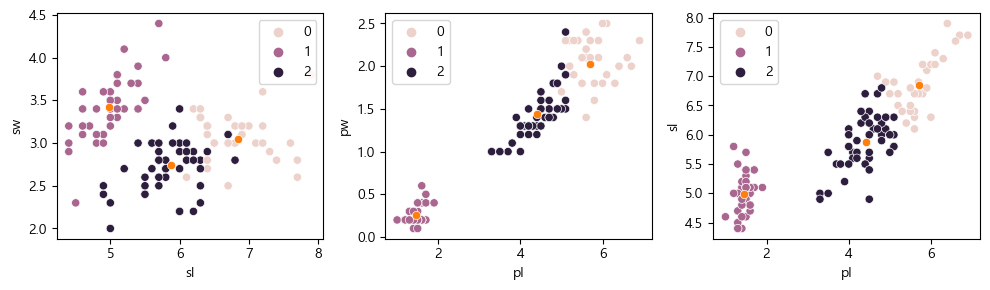

In [78]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)    
sns.scatterplot(x="sl", y="sw", data=X_train, hue="pred_cluster")
sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1])

plt.subplot(1,3,2)    
sns.scatterplot(x="pl", y="pw", data=X_train, hue="pred_cluster")
sns.scatterplot(x=model.cluster_centers_[:, 2], y=model.cluster_centers_[:, 3])

plt.subplot(1,3,3) 
sns.scatterplot(x="pl", y="sl", data=X_train, hue="pred_cluster")
sns.scatterplot(x=model.cluster_centers_[:, 2], y=model.cluster_centers_[:, 0])


plt.tight_layout()
plt.show()

## 모델튜닝
* 최적의 k값 찾기 

In [87]:
k_list=[2,3,4,5]
i_list=[]
for k in k_list:
    model = KMeans(n_clusters=k, random_state=1212)
    model.fit(X_train)
    pred = model.predict(X_train)
  
    sscore = silhouette_score(X_train, model.labels_, random_state=1111)
    print(f'k{k}실루엣스코어: ',sscore)
    i_list.append([k,model.inertia_])
    print(model.inertia_) #가장 가까운헤더~샘플간의 거리합계
i_list

k2실루엣스코어:  0.634347598032402
197.33945123578408
k3실루엣스코어:  0.685656279382805
62.17080257566833
k4실루엣스코어:  0.5652132217191486
48.654913546471654
k5실루엣스코어:  0.5181754311589971
38.8042574305975


[[2, 197.33945123578408],
 [3, 62.17080257566833],
 [4, 48.654913546471654],
 [5, 38.8042574305975]]

In [89]:
temp = pd.DataFrame(i_list)
i_list

[[2, 197.33945123578408],
 [3, 62.17080257566833],
 [4, 48.654913546471654],
 [5, 38.8042574305975]]

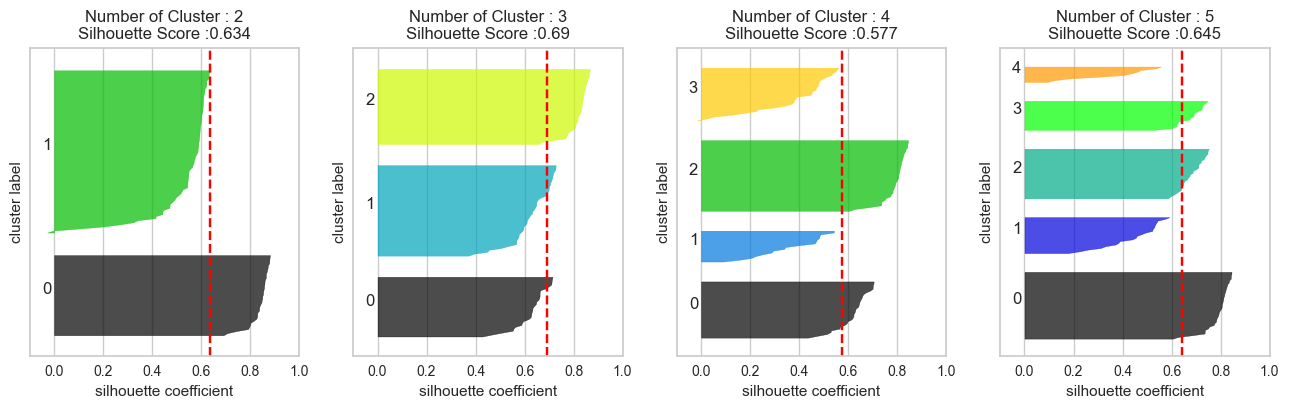

In [91]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

    
def my_chart(cluster_lists, X): 
    
    fig, axs = plt.subplots(figsize=(4*len(cluster_lists), 4), 
                            nrows=1, 
                            ncols=len(cluster_lists))

    for ind, k in enumerate(cluster_lists):
        
        kmeans = KMeans(n_clusters = k , 
                           max_iter=500, random_state=0)
        cluster_labels = kmeans.fit_predict(X)

        sil_coef_mean = silhouette_score(X, cluster_labels)
        sil_coef      = silhouette_samples(X, cluster_labels)
        
        X['pred_cluster_label'] = cluster_labels
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(k)+'\n' \
                          'Silhouette Score :' + str(round(sil_coef_mean,3)) )
        axs[ind].set_xlabel("silhouette coefficient")
        axs[ind].set_ylabel("cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X) + (k + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 막대 그래프
        for i in range(k):
            ith_cluster_sil_coef = sil_coef[cluster_labels==i]
            ith_cluster_sil_coef.sort()

            size_cluster_i = ith_cluster_sil_coef.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / k)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_coef, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_coef_mean, color="red", linestyle="--")
my_chart([2,3,4,5], X_train)

In [93]:
from sklearn.cluster import DBSCAN

In [94]:
y = df['target']
X = df.drop(['target'],  axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                     stratify=y, random_state=1111)
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape  )

# model = KMeans(n_clusters=3, random_state=1111)
model = DBSCAN(eps=0.5, min_samples=5, leaf_size=30)       
pred = model.fit_predict(X_train)

sscore = silhouette_score(X_train[['sl','sw','pl','pw']], model.labels_, random_state=1111)
print ( f"실루엣스코어: {sscore:.4f}")
#print(model.inertia_)  #(가장가까운헤더 ~ 샘플) 간의 거리 합

(120, 4) (30, 4) (120,) (30,)
실루엣스코어: 0.4272


In [95]:
# eps=0.5, min_samples=5

y = df['target']
X = df.drop(['target'],  axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,                                                     stratify=y, random_state=1111)
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape  )
eps_list = [.5, .7, .8, .9]
min_samples_list = [5,6,7,8,9]
scores = []
for v_eps in eps_list:
    for v_min_sample in min_samples_list:
        model = DBSCAN(eps=v_eps, min_samples=v_min_sample, leaf_size=30)       
        pred = model.fit_predict(X_train)
        
        sscore = silhouette_score(X_train[['sl','sw','pl','pw']], model.labels_, random_state=1111)
        print ( f"{v_eps} {v_min_sample} 실루엣스코어: {sscore:.4f}")
        scores.append( [v_eps, v_min_sample, sscore]   )

(120, 4) (30, 4) (120,) (30,)
0.5 5 실루엣스코어: 0.4272
0.5 6 실루엣스코어: 0.3733
0.5 7 실루엣스코어: 0.3685
0.5 8 실루엣스코어: 0.3580
0.5 9 실루엣스코어: 0.3463
0.7 5 실루엣스코어: 0.5085
0.7 6 실루엣스코어: 0.5278
0.7 7 실루엣스코어: 0.5278
0.7 8 실루엣스코어: 0.5278
0.7 9 실루엣스코어: 0.5278
0.8 5 실루엣스코어: 0.5220
0.8 6 실루엣스코어: 0.5220
0.8 7 실루엣스코어: 0.5220
0.8 8 실루엣스코어: 0.5220
0.8 9 실루엣스코어: 0.5220
0.9 5 실루엣스코어: 0.4805
0.9 6 실루엣스코어: 0.4805
0.9 7 실루엣스코어: 0.5045
0.9 8 실루엣스코어: 0.5045
0.9 9 실루엣스코어: 0.5045


In [96]:
pd.DataFrame(scores, columns=['eps','msam','score']).sort_values(by="score", ascending=False).head()

,eps,msam,score
6,0.7,6,0.527756
7,0.7,7,0.527756
8,0.7,8,0.527756
9,0.7,9,0.527756
10,0.8,5,0.521981


In [98]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [99]:
from scipy.cluster.hierarchy import fcluster

dist =  linkage(X,method='complete')
pred_df = pd.DataFrame(fcluster(dist,4, criterion='distance'), columns=["pred"])
print(pred_df.value_counts())
print("---"*20)
print(pred_df[pred_df["pred"]==1].index.values)
print(pred_df[pred_df["pred"]==2].index.values)
print(pred_df[pred_df["pred"]==3].index.values)
print("---"*20)
ct = pd.crosstab(pred_df['pred'],y)
print(ct)

pred
1       72
3       50
2       28
dtype: int64
------------------------------------------------------------
[ 50  51  52  54  56  58  63  65  68  70  72  73  74  75  76  77  78  83
  85  86  87  91  97 100 101 102 103 104 105 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
[ 53  55  57  59  60  61  62  64  66  67  69  71  79  80  81  82  84  88
  89  90  92  93  94  95  96  98  99 106]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
------------------------------------------------------------
target   0   1   2
pred              
1        0  23  49
2        0  27   1
3       50   0   0
